In [53]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tradingrrl import TradingRRL
fname = "../data/USDJPY30.csv"
init_t = 6000

T = 1000
M = 200
mu = 10000
sigma = 0.04
rho = 1.0
n_epoch = 10000

# RRL agent with initial weight.
ini_rrl = TradingRRL(T, M, init_t, mu, sigma, rho, n_epoch)
ini_rrl.load_csv(fname)
ini_rrl.set_t_p_r()
ini_rrl.calc_dSdw()
    
rrl = TradingRRL(T, M, init_t,  mu, sigma, rho, n_epoch)
rrl.all_t = ini_rrl.all_t
rrl.all_p = ini_rrl.all_p
rrl.set_t_p_r()


,avg,gen,max,min,nevals,std
0,-0.368222,0,-0.021235,-0.709421,100,0.183684
1,-0.197453,1,-0.026578,-0.654332,72,0.136693
2,-0.089361,2,-0.017827,-0.269685,55,0.052488
3,-0.053922,3,-0.017827,-0.159953,57,0.027460
4,-0.043439,4,-0.013700,-0.278245,69,0.031444
5,-0.028733,5,-0.007311,-0.068984,69,0.012657
6,-0.023379,6,-0.003474,-0.197488,59,0.024856
7,-0.015022,7,0.006131,-0.034921,56,0.006486
8,-0.014165,8,0.006790,-0.156055,62,0.021144
9,-0.006553,9,0.011692,-0.034730,35,0.006059


In [54]:
import random
import numpy as np

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", np.ndarray, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("attr_bool", random.uniform, -2, 2)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=M+2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual):
    return rrl.calc_S(individual),
#     return sum(individual),

def cxTwoPointCopy(ind1, ind2):
    size = len(ind1)
    cxpoint1 = random.randint(1, size)
    cxpoint2 = random.randint(1, size - 1)
    if cxpoint2 >= cxpoint1:
        cxpoint2 += 1
    else: # Swap the two cx points
        cxpoint1, cxpoint2 = cxpoint2, cxpoint1

    ind1[cxpoint1:cxpoint2], ind2[cxpoint1:cxpoint2] \
        = ind2[cxpoint1:cxpoint2].copy(), ind1[cxpoint1:cxpoint2].copy()
        
    return ind1, ind2
    
    
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", cxTwoPointCopy)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)


#random.seed(64)

pop = toolbox.population(n=100)
hof = tools.HallOfFame(1, similar=np.array_equal)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

population, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, stats=stats, halloffame=hof)
                        



gen	nevals	avg      	std     	min      	max       
0  	100   	-0.368222	0.183684	-0.709421	-0.0212352
1  	72    	-0.197453	0.136693	-0.654332	-0.0265777
2  	55    	-0.0893611	0.0524875	-0.269685	-0.0178268
3  	57    	-0.0539216	0.0274605	-0.159953	-0.0178268
4  	69    	-0.0434386	0.0314439	-0.278245	-0.0137004
5  	69    	-0.0287331	0.0126571	-0.0689836	-0.00731097
6  	59    	-0.0233785	0.0248557	-0.197488 	-0.00347387
7  	56    	-0.0150218	0.00648569	-0.0349213	0.00613142 
8  	62    	-0.0141646	0.0211441 	-0.156055 	0.00678978 
9  	35    	-0.00655318	0.00605948	-0.0347297	0.0116918  
10 	56    	-0.00482337	0.0153411 	-0.141753 	0.016531   
11 	62    	8.55548e-05	0.0135085 	-0.118096 	0.0221622  
12 	53    	0.0021483  	0.0242267 	-0.140024 	0.0221622  
13 	48    	0.0107496  	0.0074467 	-0.0108409	0.0308988  
14 	65    	0.0163598  	0.00613906	-0.00381398	0.0308988  
15 	65    	0.0167933  	0.0192118 	-0.120025  	0.0318869  
16 	65    	0.0221929  	0.0151867 	-0.12076   	0.0318869  
17 	62 

In [68]:
df =pd.DataFrame(logbook)
# Training for initial term T.
plt.plot((df["gen"])*100,df["max"])
plt.title("Sharp's ratio optimization")
plt.xlabel("Epoch times")
plt.ylabel("Sharp's ratio")
plt.grid(True)
plt.savefig("sharp's ratio optimization.png", dpi=300)
plt.close

<function matplotlib.pyplot.close>

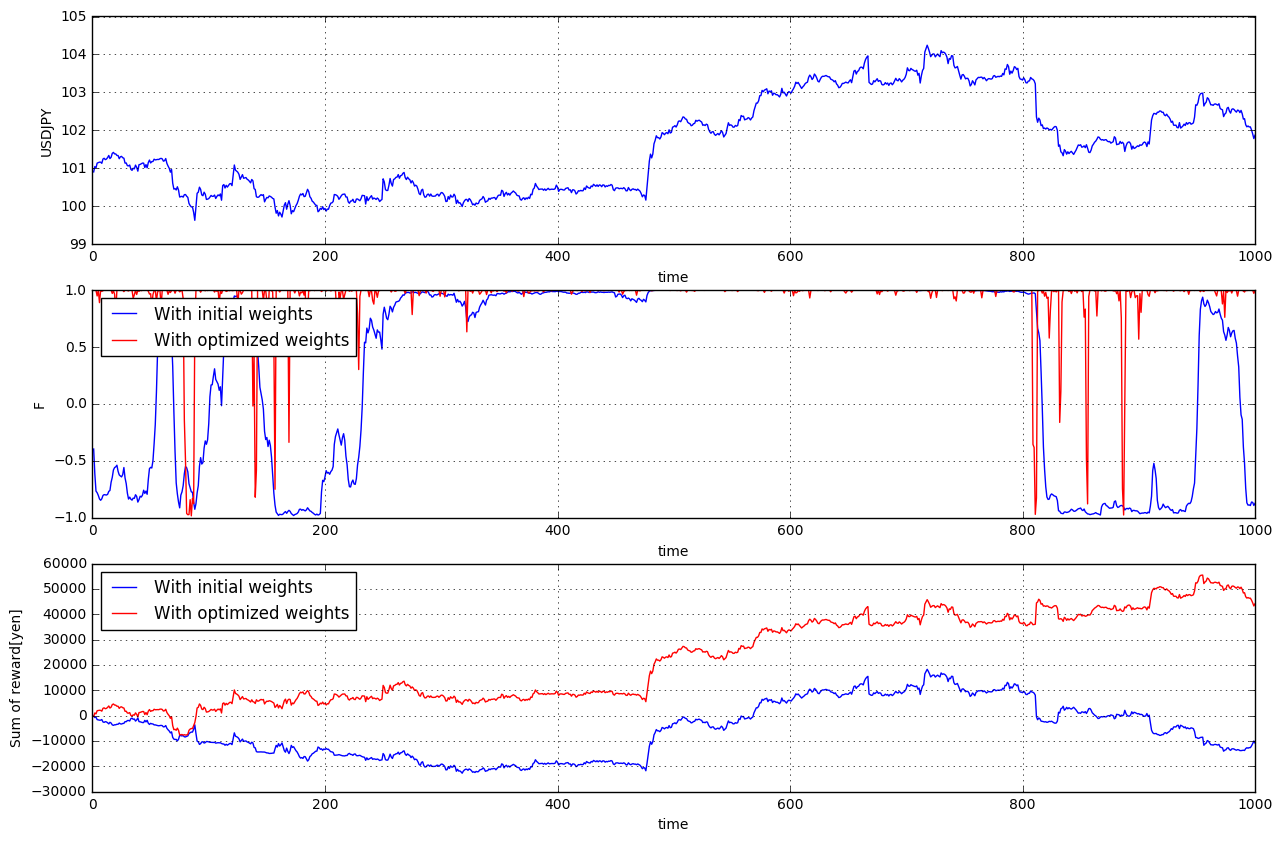

In [55]:
rrl.calc_dSdw()

fig, ax = plt.subplots(nrows=3, figsize=(15, 10))
t = np.linspace(1, rrl.T, rrl.T)[::-1]
ax[0].plot(t, rrl.p[:rrl.T])
ax[0].set_xlabel("time")
ax[0].set_ylabel("USDJPY")
ax[0].grid(True)

ax[1].plot(t, ini_rrl.F[:rrl.T], color="blue", label="With initial weights")
ax[1].plot(t, rrl.F[:rrl.T], color="red", label="With optimized weights")
ax[1].set_xlabel("time")
ax[1].set_ylabel("F")
ax[1].legend(loc="upper left")
ax[1].grid(True)

ax[2].plot(t, ini_rrl.sumR, color="blue", label="With initial weights")
ax[2].plot(t, rrl.sumR, color="red", label="With optimized weights")
ax[2].set_xlabel("time")
ax[2].set_ylabel("Sum of reward[yen]")
ax[2].legend(loc="upper left")
ax[2].grid(True)
plt.show()

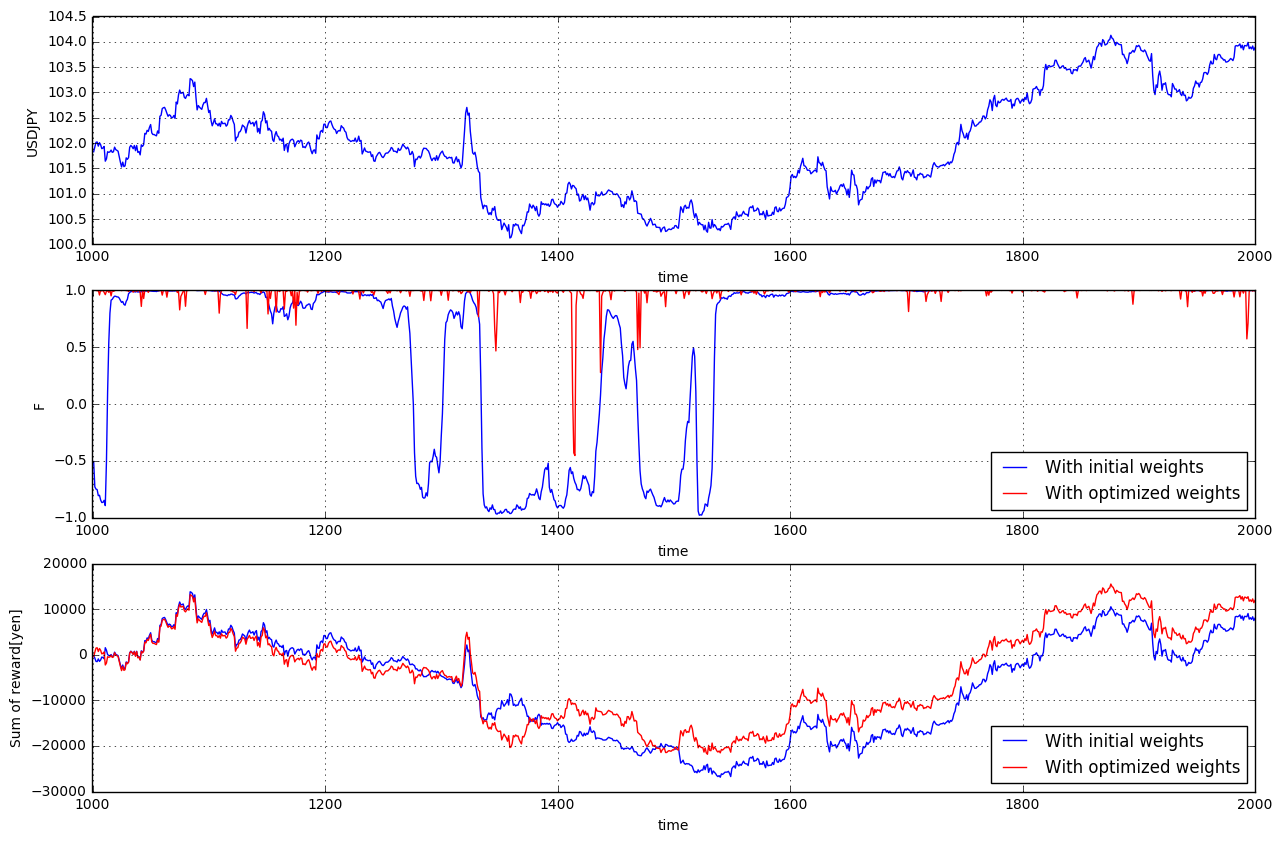

In [56]:
# Prediction for next term T with optimized weight.
# RRL agent with initial weight.
init_t_other = init_t-1*T
ini_rrl_f = TradingRRL(T, M, init_t_other, mu, sigma, rho, n_epoch)
ini_rrl_f.all_t = ini_rrl.all_t
ini_rrl_f.all_p = ini_rrl.all_p
ini_rrl_f.set_t_p_r()
ini_rrl_f.calc_dSdw()

# RRL agent with optimized weight.
rrl_f = TradingRRL(T, M, init_t_other, mu, sigma, rho, n_epoch)
rrl_f.all_t = ini_rrl.all_t
rrl_f.all_p = ini_rrl.all_p
rrl_f.set_t_p_r()
rrl_f.w = rrl.w
rrl_f.calc_dSdw()

fig, ax = plt.subplots(nrows=3, figsize=(15, 10))
t_f = np.linspace(rrl.T+1, rrl.T+rrl.T, rrl.T)[::-1]
ax[0].plot(t_f, rrl_f.p[:rrl_f.T])
ax[0].set_xlabel("time")
ax[0].set_ylabel("USDJPY")
ax[0].grid(True)

ax[1].plot(t_f, ini_rrl_f.F[:rrl_f.T], color="blue", label="With initial weights")
ax[1].plot(t_f, rrl_f.F[:rrl_f.T], color="red", label="With optimized weights")
ax[1].set_xlabel("time")
ax[1].set_ylabel("F")
ax[1].legend(loc="lower right")
ax[1].grid(True)

ax[2].plot(t_f, ini_rrl_f.sumR, color="blue", label="With initial weights")
ax[2].plot(t_f, rrl_f.sumR, color="red", label="With optimized weights")
ax[2].set_xlabel("time")
ax[2].set_ylabel("Sum of reward[yen]")
ax[2].legend(loc="lower right")
ax[2].grid(True)
plt.show()